Calls and Puts Modelling

In [ ]:
import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma * np.sqrt(T) # Modelling
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T) * N(d2) # Write it manually

def BS_PUT(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r*T) * N(-d2) - S * N(-d1)


![put_black_scholes_formula.png](attachment:put_black_scholes_formula.png)

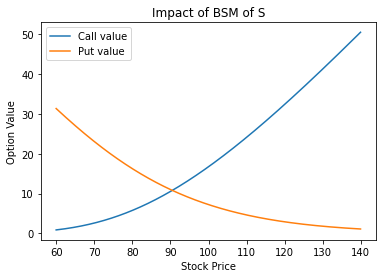

In [ ]:
import matplotlib.pyplot as plt
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1) # Array range

calls = [BS_CALL(s, K , T , r ,sigma) for s in S] # Array of series of option value
puts = [BS_PUT(s, K , T , r ,sigma) for s in S]

plt.plot(S,calls, label = 'Call value')
plt.plot(S,puts, label = 'Put value')
plt.xlabel('Stock Price')
plt.ylabel('Option Value')
plt.title('Impact of BSM of S')
plt.legend()


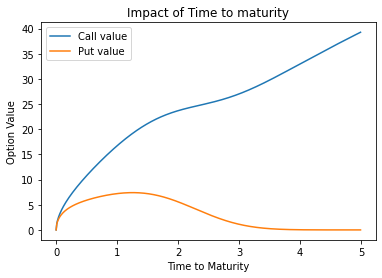

In [ ]:
K = 100
r = 0.1
S = 100
sigma = 0.3

T = np.arange(0,5,0.01) # Array range

calls = [BS_CALL(S, K , t , r ,sigma) for t in T] # Array of series of option value
puts = [BS_PUT(S, K , t , r ,sigma) for t in T]

plt.plot(T,calls, label = 'Call value')
plt.plot(T,puts, label = 'Put value')
plt.xlabel('Time to Maturity')
plt.ylabel('Option Value')
plt.title('Impact of Time to maturity')
plt.legend()


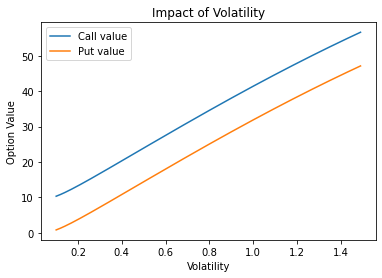

In [ ]:
K = 100
r = 0.1
S = 100
T = 1

Sig = np.arange(0.1,1.5,0.01) # Array range

calls = [BS_CALL(S, K , T , r ,sig) for sig in Sig] # Array of series of option value
puts = [BS_PUT(S, K , T , r ,sig) for sig in Sig]

plt.plot(Sig,calls, label = 'Call value')
plt.plot(Sig,puts, label = 'Put value')
plt.xlabel('Volatility')
plt.ylabel('Option Value')
plt.title('Impact of Volatility')
plt.legend()


![BSM%20Dividend.png](attachment:BSM%20Dividend.png)

In [ ]:
# BSM Model with dividend

import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL_D(S, K , T , r , q, sigma):
    d1 = (np.log(S/K) + ((r-q) + sigma**2/2)*T) / sigma * np.sqrt(T) # Modelling
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q*T) * N(d1) - K * np.exp(-r*T) * N(d2) # Write it manually


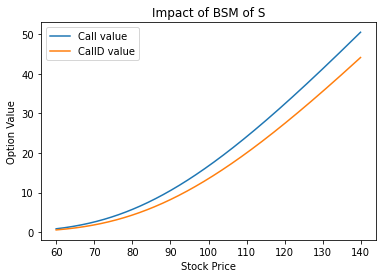

In [ ]:
import matplotlib.pyplot as plt
K = 100
r = 0.1
q = 0.05 # Annualised dividend - Stock price is expected to drop as compared to another stock without dividend
T = 1
sigma = 0.3

S = np.arange(60,140,0.1) # Array range

calls = [BS_CALL(s, K , T , r ,sigma) for s in S] # Array of series of option value
callsD = [BS_CALL_D(s, K , T , r , q , sigma) for s in S]

plt.plot(S,calls, label = 'Call value')
plt.plot(S,callsD, label = 'CallD value')
plt.xlabel('Stock Price')
plt.ylabel('Option Value')
plt.title('Impact of BSM of S')
plt.legend()


![OptionGreek4.png](attachment:OptionGreek4.png)

In [ ]:
K = 100
S = 100
r = 0.1
sigma = 0.3
def optDelta(q,T):
    d1 = ((np.log(S/K) + ((r-q)+ sigma**2/2)*T)) / (sigma*np.sqrt(T)) # BSM Dividend
    return np.exp(-q*T) * d1 * 100


In [ ]:
optDelta(0.05,5)


55.145963909461415

![put_call_parity-1024x221.png](attachment:put_call_parity-1024x221.png)

In [ ]:
import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL_PCP(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma * np.sqrt(T) # Modelling
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T) * N(d2) # Write it manually

def BS_PUT_PCP(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    return (S * N(d1) - K * np.exp(-r*T) * N(d2)) + K * np.exp(-r*T) - S


In [ ]:
BS_PUT_PCP(100,100,1,0.1,0.3)


7.217875385982609

In [ ]:
BS_PUT(100,100,1,0.1,0.3)


7.217875385982609